In [1]:
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

In [17]:
iris = datasets.load_iris()
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris.data,columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['species'] = species
iris.head()


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:


def plot_iris(iris):
    setosa = iris[iris['species'] == 'setosa']
    versicolor = iris[iris['species'] == 'versicolor']
    virginica = iris[iris['species'] == 'virginica']
    
    fig,ax = plt.subplots(2,2,figsize=(12,12))
    x_ax = ['Sepal_Length','Sepal_Width']
    y_ax = ['Petal_Length','Petal_Width']
    
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]],setosa[y_ax[j]],marker='x')
            ax[i,j].scatter(versicolor[x_ax[i]],versicolor[y_ax[j]],marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]],virginica[y_ax[j]],marker = '*')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            ax[i,j].set_title("plot between "+x_ax[i]+" and "+y_ax[j])
            

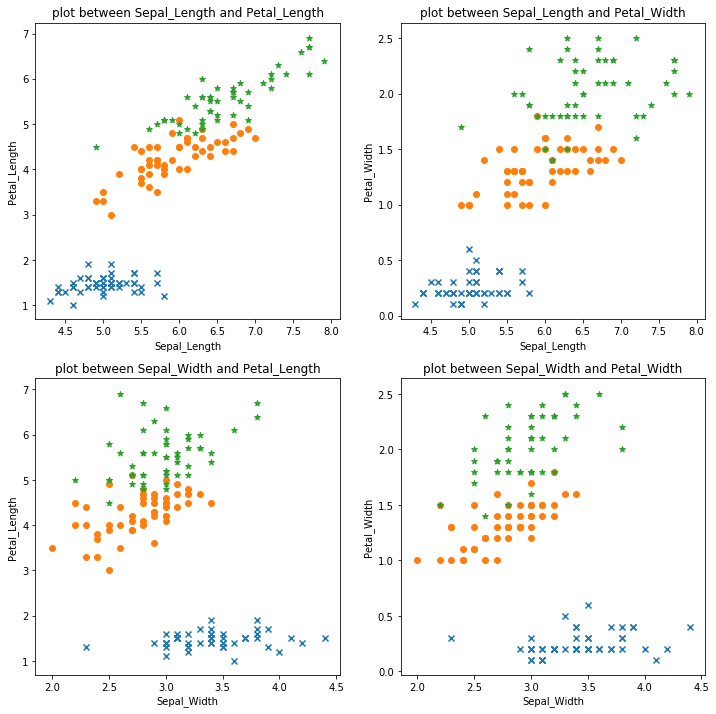

In [26]:
plot_iris(iris)

# Labeling and converting features and lablels to numpy array

In [ ]:
from sklearn import preprocessing
#We are using this sklearn.preprocessing to label a numeric value to each category of a column

In [121]:
#le = preprocessing.LabelEncoder()     #Created the object
#le.fit(iris['species'])  #Fit the column into cretaed object
#print(le.classes_)   #it shows you all the distinct classes
#levels = le.transform(iris['species'])  # Finally transform all the values into numrical values
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels = np.array([levels[x] for x in iris['species']])
print(Labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [122]:
#converting Features and Lables to numpy values becoz scikit learn accepts only numpy values

Features = np.array(iris[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]) 

Labels = np.array(Labels)

# Train Test Split DataSet

In [123]:
nr.seed(1993)
indx = range(Features.shape[0])  #it gives me the range(o to total datapoints in dataset)

indx = ms.train_test_split(indx,test_size = 100) #it splits the dataset into 2 parts Train data =50 and Test Data = 100(test_size)

X_train = Features[indx[0],:]
Y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
Y_test = np.ravel(Labels[indx[1]])

# Numeic Features Rescaling

In [124]:
scaler = preprocessing.StandardScaler()  #A Z-score object(mean =0 and std dev. = 1) is created using Standard Scaler Function
scaler.fit(X_train)  # the scaler is fit to the trainig features and subsequently the same scale is used to apply 
                    # on test data
                    #one thing to be noted that scale object must fit on training data.

#print(scaler.mean_)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# Linear Support Vector Machine (Train the Data using LinearSVC Function From Scikit Learn SVM Package) 

In [125]:
from sklearn import svm

In [126]:
nr.seed(1114)
svm_mod = svm.LinearSVC()
svm_mod.fit(X_train,Y_train)

#Hyperparameters are displayed below

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [127]:
Y_predicted = svm_mod.predict(X_test)
print(Y_predicted)

[2 2 2 0 0 0 2 0 0 2 0 0 2 2 0 2 1 0 1 1 1 2 0 2 2 0 2 1 0 2 1 2 0 0 2 0 1
 1 0 1 1 2 2 2 1 0 1 2 0 1 1 2 2 1 2 2 1 1 0 0 2 1 2 1 0 2 2 0 1 2 2 1 2 0
 1 1 2 1 0 2 1 1 1 1 0 0 0 2 1 2 1 0 0 2 0 1 2 1 2 1]


# Evaluate Model Result

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import collections
from sklearn.metrics import accuracy_score

collections.Counter(Y_test)




Counter({2: 34, 0: 31, 1: 35})

In [138]:
def print_metrics(Y_test,Y_predicted):
    conf_matrix = confusion_matrix(Y_test,Y_predicted)  #confusion matrix
    print("                 Confusion Matrix")
    print('                 Score_Setosa   Score_Versicolor    Score_Virginica')
    print('Actual_Setosa      %3d' % conf_matrix[0,0] + '            %3d' % conf_matrix[0,1] + '                %3d' % conf_matrix[0,2])
    print('Actual_Versicolor  %3d' % conf_matrix[1,0] + '            %3d' % conf_matrix[1,1] + '                %3d' % conf_matrix[1,2])
    print('Actual_Vriginica   %3d' % conf_matrix[2,0] + '            %3d' % conf_matrix[2,1] + '                %3d' % conf_matrix[2,2])

    print("\n\n",100*"*")
    
    metrics_matrix = precision_recall_fscore_support(Y_test,Y_predicted)
  
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.3f' % metrics_matrix[3][0] + '     %0.3f' % metrics_matrix[3][1] + '      %0.3f' % metrics_matrix[3][2])
    print('Precision   %0.3f' % metrics_matrix[0][0] + '      %0.3f' % metrics_matrix[0][1] + '       %0.3f' % metrics_matrix[0][2])
    print('Recall      %0.3f' % metrics_matrix[1][0] + '      %0.3f' % metrics_matrix[1][1] + '       %0.3f' % metrics_matrix[1][2])
    print('F1          %0.3f' % metrics_matrix[2][0] + '      %0.3f' % metrics_matrix[2][1] + '       %0.3f' % metrics_matrix[2][2])
    
    print("\n\n")
    print("Accuracy =  %0.3f"  % accuracy_score(Y_test, Y_predicted))
    
print_metrics(Y_test,Y_predicted)    

                 Confusion Matrix
                 Score_Setosa   Score_Versicolor    Score_Virginica
Actual_Setosa       30              1                  0
Actual_Versicolor    0             29                  6
Actual_Vriginica     0              3                 31


 ****************************************************************************************************
          Setosa  Versicolor  Virginica
Num case   31.000     35.000      34.000
Precision   1.000      0.879       0.838
Recall      0.968      0.829       0.912
F1          0.984      0.853       0.873



Accuracy =  0.900


# Plotting Scores of Y_test and Y_Predicted

[1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0]


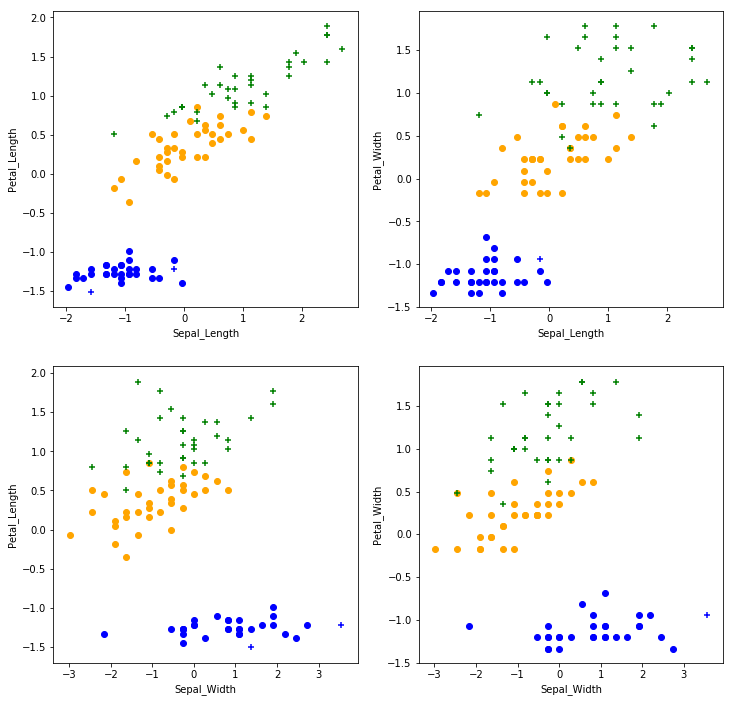

In [141]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    print(true)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, Y_test, scores)
    
    

#Ytest_Ypredicted(iris,Y_test,Y_predicted)